In [1]:
print("hello world")

hello world


In [2]:
!mkdir -p ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import kaggle

In [6]:
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:40<00:00, 21.4MB/s]
100% 812M/812M [00:40<00:00, 21.2MB/s]


In [7]:
from zipfile import ZipFile

dataset = ZipFile("dogs-vs-cats.zip")
dataset.extractall()

In [8]:
train_data = ZipFile("train.zip")
train_data.extractall()

# Analysing the train data

In [2]:
import os
data = os.listdir("/content/train")
print(len(data))

25000


In [3]:
count_c = 0
count_d = 0

for i in range(2000):
  name = data[i][:3]
  if name=='cat':
    count_c += 1
  else:
    count_d += 1

In [4]:
print(count_c, count_d)

1020 980


In [8]:
os.mkdir("/content/reducedd_images")

In [9]:
from PIL import Image
import matplotlib.pyplot as plt


original_path = "/content/train/"
reduced_path = "/content/reducedd_images/"

for i in range(2000):
  img = Image.open(original_path+data[i])
  img = img.resize((224, 224))
  img = img.convert('RGB')

  img.save(reduced_path+data[i])

In [10]:
new_path = os.listdir("/content/reducedd_images")

print(len(new_path))


2000


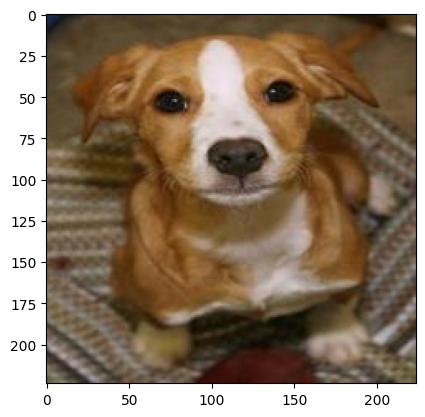

In [11]:
temp_img = Image.open("/content/reduced_images/"+data[5])
plt.imshow(temp_img)
plt.show(temp_img)

In [12]:
labels = []

for i in range(2000):
  name = data[i][0:3]
  if(name=="cat"):
    labels.append(0)
  else:
    labels.append(1)

print(len(labels))

2000


In [13]:
import numpy as np

values, count = np.unique(labels, return_counts=True)

print(values)
print(count)

[0 1]
[1020  980]


In [14]:
print(labels)

[0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 

In [15]:
import glob
import cv2

updated_path = '/content/reducedd_images/'
image_extensions = ["png", "jpg"]

listn = []

[listn.extend(glob.glob(updated_path+"*."+e)) for e in image_extensions]

numpy_images = np.asarray([cv2.imread(file) for file in listn])

In [16]:
print(len(numpy_images))

2000


In [17]:
print(numpy_images.shape)

(2000, 224, 224, 3)


In [18]:
X = numpy_images
Y = np.asarray(labels)

In [19]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [21]:
print(X_train.shape, Y_train.shape, x_test.shape, y_test.shape)

(1600, 224, 224, 3) (1600,) (400, 224, 224, 3) (400,)


In [20]:
X_train_scaled = X_train/255
x_test_scaled = x_test/255

# Building the Neural Network

In [23]:
import tensorflow as tf
import tensorflow_hub as hub

In [25]:
mobilenet_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(228, 228, 3),
                                  trainable=False)

In [32]:
import tensorflow as tf
import tensorflow_hub as hub

num_classes = 2

# Example: Loading a pre-trained model from TensorFlow Hub
pretrained_model = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5",
                                  input_shape=(224, 224, 3),
                                  trainable=False)  # Example model

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_classes)
])

model.summary()


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7c269520bd00> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [31]:
!pip install --upgrade tensorflow tensorflow_hub

In [ ]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)